In [1]:
import sys
sys.path.append('/home/michael/jupyter/local-packages')

from localUtilities import dateUtils

import pandas as pd

import datetime

# Save the data
from pathlib import Path

theBaseCompaniesDirectory = '/home/michael/jupyter/earningDateData/Companies/'
csvSuffix = '.csv'
excelSuffix = '.xlxs'

startday = '2020-01-06' 

# Get saved data
companyEarningsWeek = startday + '/'
companyListFile = 'SummaryWeekOf-' + startday + excelSuffix
baseDir = theBaseCompaniesDirectory + companyEarningsWeek
earningWeekDir = Path(baseDir)

excelEarningsDateDF =  pd.read_excel('/home/michael/jupyter/earningDateData/Companies/2020-01-06/SummaryWeekOf-2020-01-06.xlsx', 'PSMT')

excelCurrentEarningsDateDF = excelEarningsDateDF.iloc[0:1,]
excelPastEarningsDateDF = excelEarningsDateDF.iloc[2:,]

headers = excelPastEarningsDateDF.iloc[0]
excelPastEarningsDateDF  = pd.DataFrame(excelPastEarningsDateDF.values[1:], columns=headers)

excelPastEarningsDateDF.reindex


<bound method DataFrame.reindex of nan Symbol        Earnings_Date         Company EPS_Estimate Reported_EPS  \
0     PSMT  2019-10-29 20:00:00  PriceSmart Inc         0.49         0.67   
1     PSMT  2019-07-10 20:00:00  PriceSmart Inc         0.46         0.46   
2     PSMT  2019-04-09 20:00:00  PriceSmart Inc         0.67         0.79   
3     PSMT  2019-01-09 21:00:00  PriceSmart Inc         0.67         0.48   
4     PSMT  2018-10-25 22:00:00  PriceSmart Inc         0.67         0.62   
5     PSMT  2018-07-03 20:00:00  PriceSmart Inc         0.63         0.61   
6     PSMT  2018-04-06 00:00:00  PriceSmart Inc         0.74         0.47   
7     PSMT  2018-01-04 21:00:00  PriceSmart Inc         0.85         0.74   
8     PSMT  2017-10-26 20:00:00  PriceSmart Inc         0.73         0.64   
9     PSMT  2017-07-05 20:00:00  PriceSmart Inc         0.67         0.62   
10    PSMT  2017-04-06 20:00:00  PriceSmart Inc         0.92          0.9   

nan Surprise(%)   High   Open  Volume   

<function matplotlib.pyplot.plot_date(x, y, fmt='o', tz=None, xdate=True, ydate=False, *, data=None, **kwargs)>

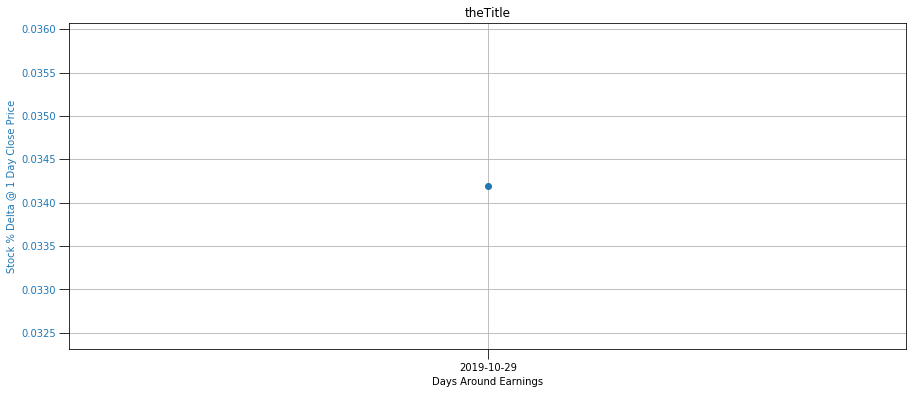

In [4]:
import itertools
from IPython.display import display, HTML

# matplotlib imports
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter


color1DayStockMove = 'tab:blue'
color4DayStockMove = 'tab:red'
xLabel = 'Days Around Earnings'
yLabel1DayStockMove = 'Stock % Delta @ 1 Day Close Price';
yLabel4DayStockMove = 'Stock % Delta @ 4 Day Close Price';
ax1LegendLabel = "1-Day % Move"
ax2LegendLabel = "4-Day % Move"

locator = mdates.AutoDateLocator(minticks=1, maxticks=5)
formatter = mdates.ConciseDateFormatter(locator)
myFmt = DateFormatter("%b-%d-%Y")

# single Plot
theStock = excelPastEarningsDateDF.iloc[0,0]
fig, ax1 = plt.subplots(figsize=(15,6));

earningDateString = excelPastEarningsDateDF['Earnings_Date'][0]
earningDateString = earningDateString[:10]
#     display(onEarningDatePastdf)
ax1.set_title('theTitle');

#display(excelPastEarningsDateDF.EDFwd1DayClosePercentDelta[earn], excelPastEarningsDateDF['Earnings_Date'][earn])

ax1.set_xlabel(xLabel);
ax1.set_ylabel(yLabel1DayStockMove, color=color1DayStockMove);
ax1.plot(earningDateString, excelPastEarningsDateDF.EDFwd1DayClosePercentDelta[0], color=color1DayStockMove, 
         label=ax1LegendLabel,  linestyle='--', marker='o' );
ax1.tick_params(axis='y', labelcolor=color1DayStockMove);
ax1.grid(True);  

#      #set up Major/Minor xAxis 
# ax1.xaxis.set_major_locator(locator)
# ax1.xaxis.set_major_formatter(formatter)
    # Format xAxis Date
# ax1.xaxis.set_major_formatter(myFmt)
ax1.tick_params(which='major', length=10)
ax1.tick_params(which='minor', length=4, color='b') 


# fig.autofmt_xdate()
plt.plot_date

In [5]:
     #set up Major/Minor xAxis 
ax1.xaxis.set_major_locator(locator)
ax1.xaxis.set_major_formatter(formatter)
    # Format xAxis Date
ax1.xaxis.set_major_formatter(myFmt)
ax1.tick_params(which='major', length=10)
ax1.tick_params(which='minor', length=4, color='b') 

# 
# 
# # instantiate a second axes that shares the same x-axis
ax2 = ax1.twinx();
ax2.set_ylabel(yLabel4DayStockMove, color=color4DayStockMove) # we already handled the x-label with ax1

ax2.plot(earningDateString, excelPastEarningsDateDF.EDFwd4DayClosePercentDelta[0], color=color4DayStockMove, 
         label=ax2LegendLabel,  linestyle='--', marker='o' )
ax2.tick_params(axis='y', labelcolor=color4DayStockMove)